<a href="https://colab.research.google.com/github/crodriguezqu/Modelado-y-simulacion/blob/master/Metodo_Radau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo Radau

El metodo Radau es un metodo basado en el metodo **Runge–Kutta** implicito que fuciona de la siguiente forma:

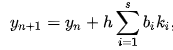

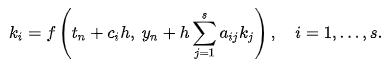

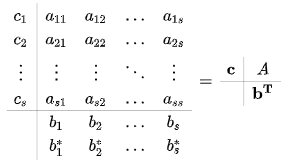

La diferencia con el metodo **Runge–Kutta** explicito, es que para el implicito, cada valor de k dependen de todos los k, creando de esta forma un sistema de ecuaciones de **s** ecuaciones y variables.

# Radau IA

El metodo de **tercer orden** esta definido por:

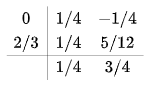

El metodo de **quinto orden** esta definido por:

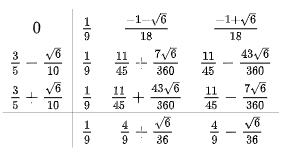

# Radau IIA

Tiene uso en ecuaciones diferenciales de orden superior, donde las **c** son raices de:

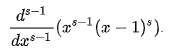

El metodo de **tercer metodo**  esta definido por:

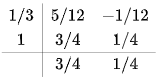

El metodo de **quinto orden** esta definido por:

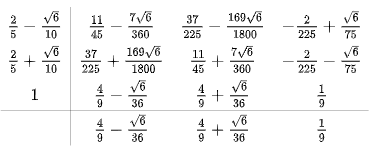

# Implementacion

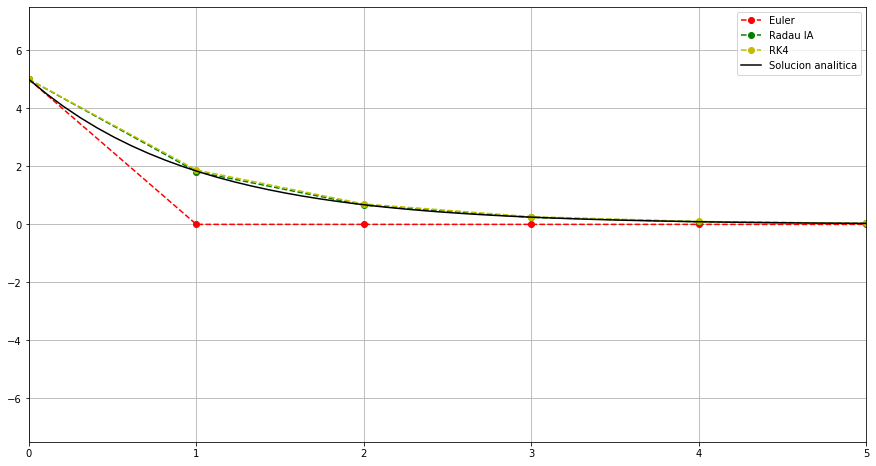

In [18]:
from sympy.solvers.solveset import linsolve
import matplotlib.pyplot as plt  
import numpy as np
from sympy import *

def fun(t_n, x_n):
  return -x_n

def radau(fun,x0,t0,tN,N):
  t= np.linspace(t0,tN,N+1)
  h= (tN-t0)/N
  x_ra=np.zeros(N+1)
  x_ra[0]= x0                         # Condicion inicial

  k1, k2 = symbols('k1, k2')
  for n in range(N):
      #k1=fun( t , y0 + h*( k1/4 - k2/4 ) )
      #k2=fun( t + 2*h/3 , y0 + h*( k1/4 + 5*k2/12 ) )
      a=list(linsolve([fun( t[n] , x_ra[n] + h*( k1/4 - k2/4 ) ) - k1 , fun( t[n] + 2*h/3 , x_ra[n] + h*( k1/4 + 5*k2/12 ) ) - k2 ], (k1, k2)))
      b=a[0]
      k11=b[0]
      k22=b[1]
      
      x_ra[n+1] = x_ra[n] + h*(k11/4 + 3*k22/4) 
  return x_ra,t

def euler(fun,x0,t0,tN,N):            # Definimos nuestro método de Euler  
  h=(tN-t0)/N
  t=np.linspace(t0,tN,N+1)
  x_euler=np.zeros(N+1)
  x_euler[0]=x0
  for n in range(N):
    x_euler[n+1]=x_euler[n]+h*fun(t[n],x_euler[n])  # x(n+1)=x(n)*hf(x(t),t)
  return x_euler,t

def rk4(fun,x0,t0,tN,N):
  t= np.linspace(t0,tN,N+1)
  h= (tN-t0)/N
  x_4rk=np.zeros(N+1)
  x_4rk[0]= x0                         # Condicion inicial

  for n in range(N):
      k1 = h*fun( t[n]         , x_4rk[n]       )
      k2 = h*fun( t[n] + (h/2) , x_4rk[n] + k1/2) 
      k3 = h*fun( t[n] + (h/2) , x_4rk[n] + k2/2 ) 
      k4 = h*fun( t[n] +  h    , x_4rk[n] + k3 )
      
      x_4rk[n+1] = x_4rk[n] + k1/6 + k2/3 + k3/3 + k4/6
  return x_4rk,t

t0=0
tN=5
N=5
x0=5

x_euler,t1=euler(fun,x0,t0,tN,N)    #euler
x_radau,t2=radau(fun,x0,t0,tN,N)    #radau
x_rk4,t2=rk4(fun,x0,t0,tN,N)        #rk4

t=np.linspace(t0,tN)
x_teo=5*np.exp(-t)

plt.figure(figsize=(15,8))
plt.plot(t1,x_euler,'--ro',label='Euler')
plt.plot(t2,x_radau,'--go',label='Radau IA')
plt.plot(t1,x_rk4,'--yo',label='RK4')
plt.plot(t,x_teo,'k',label='Solucion analitica')
plt.axis([0,5,-7.5,7.5])
plt.legend()
plt.grid()
plt.show()